# 1. 문제 정의

## 1) 배경

* 온실 가스 배출량이 증가함에 따라 기후 변화가 발생하고, 이로 인해 해수면이 상승하여 기상 이변 현상이 세계 곳곳에서 나타나고 있다. 이러한 기후 변화 문제를 해결하기 위해 우리가 생활속에서 쉽고 간단하게 실천할 수 있는 방법 중 하나는 온실 가스 배출의 주범인 자동차 이용을 줄이고, 친환경 교통수단인 자전거 타기를 활성화하는 것이다.

* 서울시는 자전기 이용을 활성화하여 시민 건강을 증진하고, 대기오염을 줄이기 위해 2015년부터 무인 공공자전거 대여 서비스인 '서울자전거 따릉이'를 제공하고 있다.

* 따릉이의 이용자가 늘어나면서 고장난 자전거도 많아져 관리자들이 자전거를 유지보수하는데 어려움을 겪고 있다. '서울시 자전거 따릉이' 관리자들이 날씨에 따른 자전거 대여 수요를 예측하여 자전거를 관리하는데 도움을 준다면 더 많은 시민들이 안전하고 편리하게 자전거를 이용할 수 있을 것이다.

## 2) 문제 정의

* 날씨에 따른 '서울시 자전거 따릉이' 대여 수요를 예측해 봅시다.

# 2. 데이터 수집 및 전처리

* 데이터 수집 : [데이콘](https://dacon.io/competitions/open/235576/data)

* 데이터 세트 설명 : 서울시 마포구의 시간별 기상상황과 따릉이 대여수 데이터 (2017년 4월 1일 ~ 5월 31일)

* 컬럼 설명

  * id: 고유 id
  * hour : 시간
  * temperature : 기온
  * precipitation : 비가 오지 않았으면 0, 비가 왔으면 1
  * windspeed : 풍속(평균)
  * humidity : 습도
  * visibility : 시정, 시계
  * ozone : 오존
  * pm10 : 미세먼지(대)
  * pm2.5 : 미세먼지(소)
  * count : 시간에 따른 따릉이 대여수

In [36]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [37]:
# 데이터 가져오기
import numpy as np
import pandas as pd

train_df = pd.read_csv('train.csv', index_col='id')
test_df = pd.read_csv('test.csv', index_col='id')

train_df.shape, test_df.shape

((1459, 11), (714, 10))

In [38]:
# 데이터 확인하기
train_df.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,season,count
id,,,,,,,,,,,
3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,fall,49
6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,spring,159
7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,fall,26
8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,winter,57
9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,summer,431


In [39]:
# 열 정보 보기
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 3 to 2179
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1457 non-null   float64
 2   hour_bef_precipitation  1457 non-null   float64
 3   hour_bef_windspeed      1450 non-null   float64
 4   hour_bef_humidity       1457 non-null   float64
 5   hour_bef_visibility     1457 non-null   float64
 6   hour_bef_ozone          1383 non-null   float64
 7   hour_bef_pm10           1369 non-null   float64
 8   hour_bef_pm2.5          1342 non-null   float64
 9   season                  1459 non-null   object 
 10  count                   1459 non-null   int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 136.8+ KB


In [40]:
test_df.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,season
id,,,,,,,,,,
0,7,20.7,0,1.3,62,954,0.041,44.0,27.0,spring
1,17,30.0,0,5.4,33,1590,0.061,49.0,36.0,summer
2,13,19.0,1,2.1,95,193,0.020,36.0,28.0,fall
4,6,22.5,0,2.5,60,1185,0.027,52.0,38.0,spring
5,22,14.6,1,3.4,93,218,0.041,18.0,15.0,winter


In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 2177
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    714 non-null    int64  
 1   hour_bef_temperature    714 non-null    float64
 2   hour_bef_precipitation  714 non-null    int64  
 3   hour_bef_windspeed      714 non-null    float64
 4   hour_bef_humidity       714 non-null    int64  
 5   hour_bef_visibility     714 non-null    int64  
 6   hour_bef_ozone          680 non-null    float64
 7   hour_bef_pm10           678 non-null    float64
 8   hour_bef_pm2.5          679 non-null    float64
 9   season                  714 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 61.4+ KB


In [42]:
train_df.isna().sum()

hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
season                      0
count                       0
dtype: int64

In [43]:
# 평균값으로 결측치 대체하기
train_df.fillna(train_df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 3 to 2179
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1459 non-null   float64
 2   hour_bef_precipitation  1459 non-null   float64
 3   hour_bef_windspeed      1459 non-null   float64
 4   hour_bef_humidity       1459 non-null   float64
 5   hour_bef_visibility     1459 non-null   float64
 6   hour_bef_ozone          1459 non-null   float64
 7   hour_bef_pm10           1459 non-null   float64
 8   hour_bef_pm2.5          1459 non-null   float64
 9   season                  1459 non-null   object 
 10  count                   1459 non-null   int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 136.8+ KB


In [45]:
train_df = pd.get_dummies(train_df)
train_df.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,season_fall,season_spring,season_summer,season_winter
id,,,,,,,,,,,,,,
3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49,1,0,0,0
6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159,0,1,0,0
7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26,1,0,0,0
8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57,0,0,0,1
9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431,0,0,1,0


In [46]:
test_df = pd.get_dummies(test_df)
test_df.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,season_fall,season_spring,season_summer,season_winter
id,,,,,,,,,,,,,
0,7,20.7,0,1.3,62,954,0.041,44.0,27.0,0,1,0,0
1,17,30.0,0,5.4,33,1590,0.061,49.0,36.0,0,0,1,0
2,13,19.0,1,2.1,95,193,0.020,36.0,28.0,1,0,0,0
4,6,22.5,0,2.5,60,1185,0.027,52.0,38.0,0,1,0,0
5,22,14.6,1,3.4,93,218,0.041,18.0,15.0,0,0,0,1


In [47]:
train_df.shape, test_df.shape

((1459, 14), (714, 13))

# 3. 데이터 분석

* 시간대별 자전거 대여수 알아보기

* Feature간 상관관계 알아보기

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

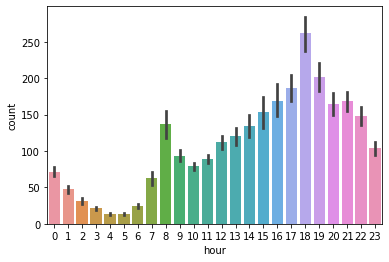

In [31]:
sns.barplot(x='hour', y='count', data=train_df)

퇴근시간인 18시에 대여가 가장 많으며, 오전보다는 오후에 대여량이 많음

오전시간에는 출근시간인 8시에 대여량이 많음

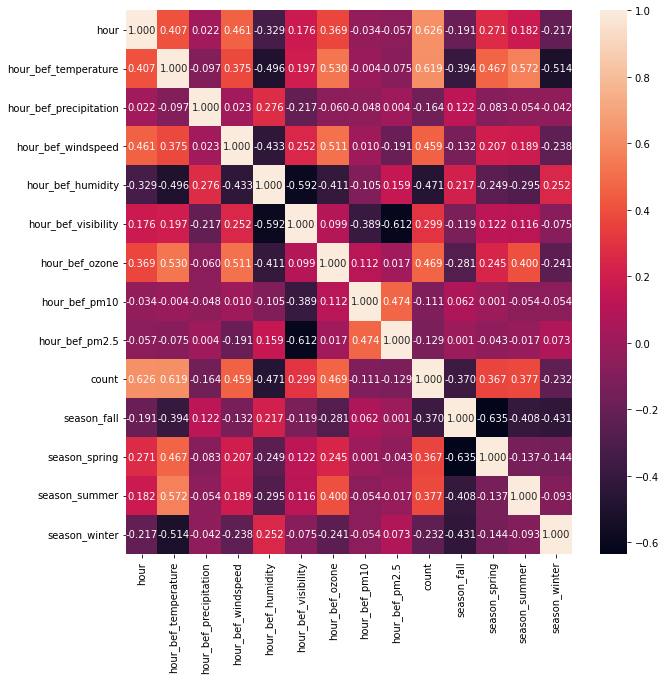

In [33]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr(), annot=True, fmt='.3f')

* 대여수를 기준으로 상관관계가 높은 Feature는 시간(hour)과 기온(temperature)임

* Feature 선택

  * 시간(hour)
  * 온도(temperature)
  * 풍속(windspeed)
  * 습도(humidity)

# 4. 모델 학습

* 딥러닝 모델을 사용하여 따릉이 수요 예측하기

In [48]:
from tensorflow import keras

In [49]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

X_data = train_df[['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity']]
y_data = train_df['count']

train_data, val_data, train_target, val_target = train_test_split(X_data.values, y_data.values, test_size=0.2, random_state=0)

In [50]:
print(train_data.shape, train_target.shape)    # (1167, 9) (1167,)
print(val_data.shape, val_target.shape)        # (292, 9) (292,)

(1167, 8) (1167,)
(292, 8) (292,)


In [51]:
# 데이터 정규화하기
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(train_data)                            
train_scaled = mms.transform(train_data)       # 학습 데이터 스케일링 하기
val_scaled = mms.transform(val_data)           # 검증 데이터 스케일링 하기

In [52]:
train_scaled[0], val_scaled[0]

(array([0.2173913 , 0.18490566, 0.05      , 0.69230769, 0.        ,
        0.        , 0.        , 1.        ]),
 array([0.13043478, 0.33207547, 0.4       , 0.84615385, 0.        ,
        0.        , 1.        , 0.        ]))

In [53]:
# 인공신경망 모델 생성하기
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(4,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,537
Trainable params: 25,537
Non-traina

In [55]:
model.compile(loss='mse',           # 손실함수
              optimizer='adam',     # 옵티마이저
              metrics=['mae'])      # MAE(Mean Absolute Error) : 예측값과 타겟값 사이의 거리

In [56]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=1000, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
37/37 [==============================] - 1s 10ms/step - loss: 18223.5664 - mae: 106.2125 - val_loss: 14951.6250 - val_mae: 93.0933
Epoch 2/1000
37/37 [==============================] - 0s 6ms/step - loss: 10152.5576 - mae: 74.4721 - val_loss: 5653.7603 - val_mae: 60.7619
Epoch 3/1000
37/37 [==============================] - 0s 5ms/step - loss: 5106.0054 - mae: 56.7588 - val_loss: 3789.4016 - val_mae: 47.9898
Epoch 4/1000
37/37 [==============================] - 0s 5ms/step - loss: 3962.1958 - mae: 49.7722 - val_loss: 3174.2334 - val_mae: 43.3987
Epoch 5/1000
37/37 [==============================] - 0s 4ms/step - loss: 3512.3696 - mae: 45.4805 - val_loss: 2943.8845 - val_mae: 39.9827
Epoch 6/1000
37/37 [==============================] - 0s 4ms/step - loss: 3242.3040 - mae: 42.8802 - val_loss: 2769.8354 - val_mae: 40.8444
Epoch 7/1000
37/37 [==============================] - 0s 4ms/step - loss: 3213.8655 - mae: 42.8323 - val_loss: 2762.3911 - val_mae: 38.0860
Epoch 8/1000
37

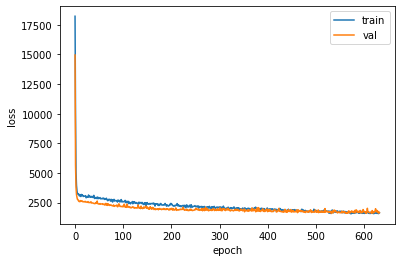

In [57]:
def make_plot():
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'val'])
  plt.show()

make_plot()

# 5. 모델 평가

In [58]:
# 모델 평가하기
model.evaluate(val_scaled, val_target)

10/10 [==============================] - 0s 2ms/step - loss: 1575.3684 - mae: 28.9384


[1575.368408203125, 28.938432693481445]

In [59]:
# 테스트값 정규화하기
test_data = test_df[['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity'']]

test_scaled = mms.transform(test_data.values)           # 테스트 데이터 스케일링 하기
test_scaled[0]

array([0.30434783, 0.65660377, 0.1625    , 0.59340659, 1.        ,
       0.        , 0.        , 0.        ])

In [61]:
# 모델 예측하기
arr = np.array([test_scaled[0]])
result = model.predict(arr)
result[0]

array([92.11279], dtype=float32)

In [ ]:
# 모델 저장하기
model.save('my_model.h5')

In [ ]:
# Scaler 저장하기
from pickle import dump 

dump(mms, open('minmax_scaler.pkl', 'wb'))

In [ ]:
from google.colab import files
files.download("minmax_scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 6. 배포

* Flask를 사용하여 웹으로 배포하기